## Introduction

This project creates an interactive business dashboard using a sample
Global Superstore dataset. The dashboard provides insights into sales,
profits, and top customers across regions, categories, and sub-categories.

Objectives:
1. Calculate KPIs such as Total Sales, Total Profit, and Top 5 Customers.
2. Provide visual insights with charts for decision-making.
3. Demonstrate business intelligence concepts using Python.

The dashboard is implemented using Pandas, Matplotlib, and Seaborn for
fast execution in Colab.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load lightweight Superstore dataset
url = "https://gist.githubusercontent.com/phuhiep13/12931adfac655a2d3d41da8144fe96e2/raw/Superstore.csv"
df = pd.read_csv(url)

# Keep only required columns
df = df[['Region','Category','Sub-Category','Customer Name','Sales','Profit']]
df.head()


,Region,Category,Sub-Category,Customer Name,Sales,Profit
0,South,Furniture,Bookcases,Claire Gute,261.9600,41.9136
1,South,Furniture,Chairs,Claire Gute,731.9400,219.5820
2,West,Office Supplies,Labels,Darrin Van Huff,14.6200,6.8714
3,South,Furniture,Tables,Sean O'Donnell,957.5775,-383.0310
4,South,Office Supplies,Storage,Sean O'Donnell,22.3680,2.5164


In [3]:
# Check missing values
df.isna().sum()

# Drop rows with missing Sales/Profit (if any)
df = df.dropna(subset=['Sales','Profit'])


In [4]:
# Example filters
selected_region = 'Central'
selected_category = 'Furniture'
selected_sub_category = 'Bookcases'

# Filter data
filtered_df = df[(df['Region'] == selected_region) &
                 (df['Category'] == selected_category) &
                 (df['Sub-Category'] == selected_sub_category)]

filtered_df.head()


,Region,Category,Sub-Category,Customer Name,Sales,Profit
38,Central,Furniture,Bookcases,Steve Nguyen,532.3992,-46.9764
399,Central,Furniture,Bookcases,Anna Gayman,2396.2656,-317.1528
468,Central,Furniture,Bookcases,David Smith,205.3328,-36.2352
954,Central,Furniture,Bookcases,Greg Hansen,78.8528,-11.5960
1594,Central,Furniture,Bookcases,Dennis Pardue,359.0580,-35.9058


In [5]:
total_sales = filtered_df['Sales'].sum()
total_profit = filtered_df['Profit'].sum()
top_customers = filtered_df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print("\nTop 5 Customers by Sales:")
print(top_customers)


Total Sales: $24,157.18
Total Profit: $-1,997.90

Top 5 Customers by Sales:
Customer Name
Anna Gayman          2396.2656
Jack O'Briant        1565.8800
Amy Hunt             1352.3976
Russell Applegate    1298.3740
Craig Molinari       1227.9984
Name: Sales, dtype: float64


/tmp/ipython-input-1211065656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')


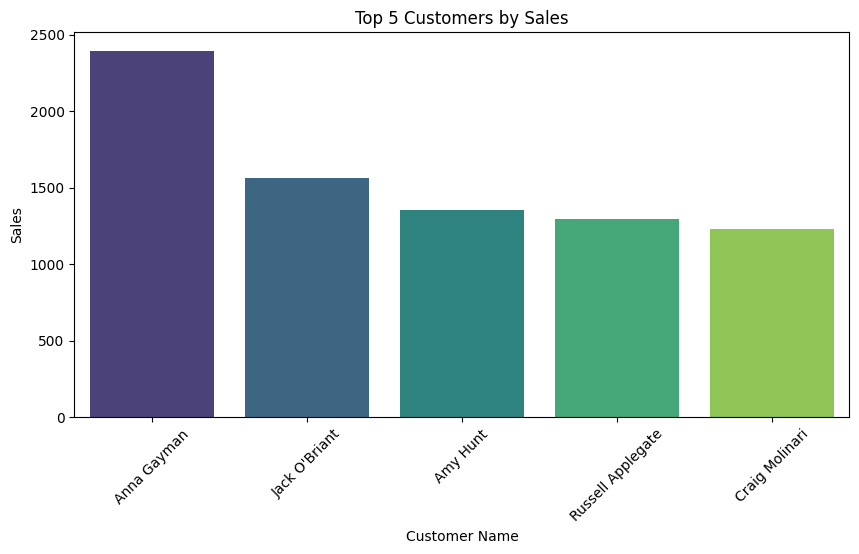

In [6]:
# Bar chart for Top 5 Customers
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.title("Top 5 Customers by Sales")
plt.show()


## Conclusion

This project provides a quick business dashboard for sales and profit
analysis using the Global Superstore dataset.

Key insights:
- Total Sales and Total Profit are calculated for any region, category, and sub-category.
- Top 5 customers are identified for targeted business decisions.
- Visualizations highlight high-performing customers and help stakeholders make data-driven decisions.

Skills gained:
- KPI calculation using Pandas
- Data visualization with Matplotlib and Seaborn
- Lightweight, fast business dashboard implementation in Colab
